# SHAPELET BASED CLASSIFICATION

In [233]:
%matplotlib inline

import os,sys,inspect
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from fma_metadata import utils
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [234]:
df = pd.read_csv('/Users/gaetanoantonicchio/Downloads/ts_dataset_Fede.csv')

In [235]:
df.set_index('track_id', inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,1632.183927,1771.411672,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,2259.879382,2154.652270,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,876.318176,734.271712,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442


In [236]:
tracks = utils.load("/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv")
gen = tracks['track'][['genre_top']]

In [237]:
df = df.merge(gen, on='track_id')

In [238]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,648,649,650,651,652,653,654,655,656,genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012,Hip-Hop
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977,Hip-Hop
148,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,1632.183927,1771.411672,...,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248,Experimental
182,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,2259.879382,2154.652270,...,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617,Rock
255,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,876.318176,734.271712,...,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442,Rock


In [239]:
df_filtered = df[df['genre_top'].isin(['Rock', 'Hip-Hop'])]

In [240]:
y = df_filtered['genre_top']
#y = y.astype(str)

In [241]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [242]:
X = df_filtered.iloc[:,:-1]
#X = np.array(X)

In [243]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
X = scaler.fit_transform(X)
X = X.squeeze()

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=1000, stratify = y)

In [245]:
X_train.shape, X_test.shape

((1397, 657), (599, 657))

In [246]:
X_train

array([[-0.16749746,  0.00568444,  0.47300296, ...,  0.04930577,
         2.34499628,  2.23404194],
       [-0.78293459, -0.07397295,  0.13801046, ..., -0.69037509,
        -0.49033616, -0.15447188],
       [ 0.55015777,  0.76268602,  0.89874833, ..., -0.11900597,
        -0.62606184, -0.75550609],
       ...,
       [ 1.11137148,  1.66737193,  1.74365825, ...,  0.49493576,
         0.36542129,  0.38443205],
       [-0.46778861, -0.12969098, -0.64347653, ..., -0.76101601,
        -0.88706663, -0.60032886],
       [-1.49347733, -0.78769935, -0.02804247, ...,  0.74736706,
         1.03079237,  0.42935708]])

In [247]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

In [206]:
help(grabocka_params_to_shapelet_size_dict)

Help on function grabocka_params_to_shapelet_size_dict in module tslearn.shapelets.shapelets:

grabocka_params_to_shapelet_size_dict(n_ts, ts_sz, n_classes, l, r)
    Compute number and length of shapelets.
    
     This function uses the heuristic from [1]_.
    
    Parameters
    ----------
    n_ts: int
        Number of time series in the dataset
    ts_sz: int
        Length of time series in the dataset
    n_classes: int
        Number of classes in the dataset
    l: float
        Fraction of the length of time series to be used for base shapelet
        length
    r: int
        Number of different shapelet lengths to use
    
    Returns
    -------
    dict
        Dictionary giving, for each shapelet length, the number of such
        shapelets to be generated
    
    Examples
    --------
    >>> d = grabocka_params_to_shapelet_size_dict(
    ...         n_ts=100, ts_sz=100, n_classes=3, l=0.1, r=2)
    >>> keys = sorted(d.keys())
    >>> print(keys)
    [10, 20]
    >>

We tried different shapelet sizes. <br>
Tested: 0.01,  0.05, 0.08, 0.1.<br>
The best one was l = 0.08

In [318]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.08,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 1397
ts_sz 657
n_classes 2
shapelet_sizes {52: 5}


In [319]:
#help(ShapeletModel)

In [321]:
# Define the model using parameters provided by the authors 
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=tf.optimizers.Adam(.01),
                        weight_regularizer=.01,
                        max_iter=1500,
                        verbose=1)

In [322]:
shp_clf.fit(X_train, y_train)

Epoch 1/1500
6/6 [==============================] - 0s 58ms/step - loss: 0.8997 - binary_accuracy: 0.5004 - binary_crossentropy: 0.8781
Epoch 2/1500
6/6 [==============================] - 0s 61ms/step - loss: 0.8378 - binary_accuracy: 0.5011 - binary_crossentropy: 0.8190
Epoch 3/1500
6/6 [==============================] - 0s 56ms/step - loss: 0.7900 - binary_accuracy: 0.4982 - binary_crossentropy: 0.7735
Epoch 4/1500
6/6 [==============================] - 0s 57ms/step - loss: 0.7526 - binary_accuracy: 0.4953 - binary_crossentropy: 0.7380
Epoch 5/1500
6/6 [==============================] - 0s 58ms/step - loss: 0.7264 - binary_accuracy: 0.4817 - binary_crossentropy: 0.7132
Epoch 6/1500
6/6 [==============================] - 0s 56ms/step - loss: 0.7105 - binary_accuracy: 0.4882 - binary_crossentropy: 0.6983
Epoch 7/1500
6/6 [==============================] - 0s 57ms/step - loss: 0.6993 - binary_accuracy: 0.5447 - binary_crossentropy: 0.6878
Epoch 8/1500
6/6 [==============================

LearningShapelets(max_iter=1500, n_shapelets_per_size={52: 5},
                  optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa103a95ed0>,
                  verbose=1, weight_regularizer=0.01)

In [323]:
predicted_labels = shp_clf.predict(X_test)

3/3 [==============================] - 0s 31ms/step


In [324]:
predicted_locations = shp_clf.locate(X_test)

3/3 [==============================] - 0s 28ms/step


In [325]:
from sklearn.metrics import classification_report, accuracy_score

In [326]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       299
           1       0.76      0.80      0.78       300

    accuracy                           0.77       599
   macro avg       0.77      0.77      0.77       599
weighted avg       0.77      0.77      0.77       599



In [327]:
print(accuracy_score(y_test, predicted_labels))

0.7729549248747913


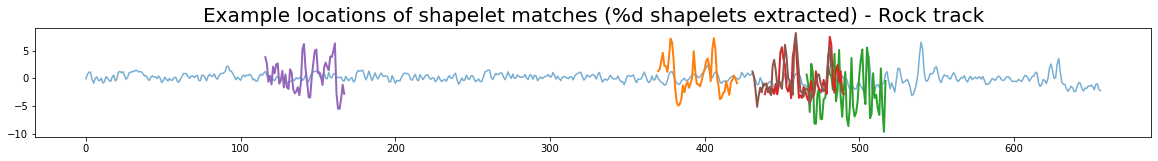

In [358]:
ts_id = 0
plt.figure(figsize=(20,2))
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted) - Rock track".format(n_shapelets), fontsize=20)                         

plt.plot(X_test[ts_id].ravel(), alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

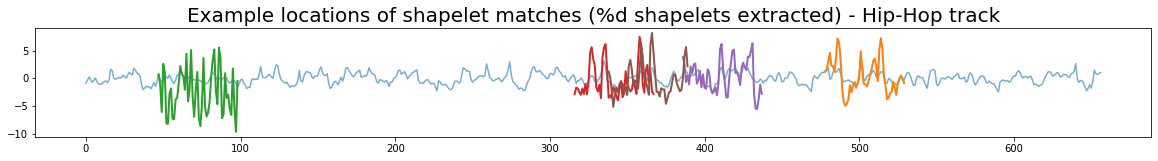

In [360]:
ts_id = 4
plt.figure(figsize=(20,2))
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted) - Hip-Hop track".format(n_shapelets), fontsize=20)                         

plt.plot(X_test[ts_id].ravel(), alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

In [354]:
# 1: Rock ,   0: Hip-Hop
predicted_labels[:5]

array([1, 1, 0, 1, 0])

In [355]:
y_test[:5]

array([1, 1, 0, 1, 0])

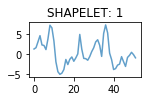

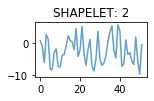

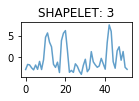

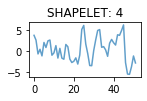

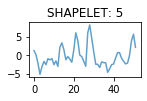

In [369]:
num_shap =[x for x in range(1,6)]
for  shapelet, i in zip(shp_clf.shapelets_, num_shap):
    
    plt.figure(figsize=(2,1))
    plt.title(f"SHAPELET: {i}")
    plt.plot(shapelet, alpha=0.7)
    plt.show()

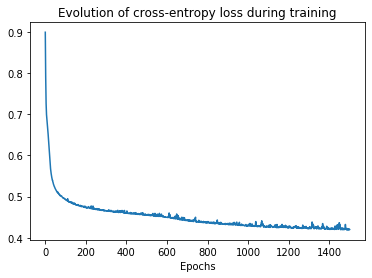

In [370]:
# The loss history is accessible via the `model_` that is a keras model
plt.figure()
plt.plot(numpy.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()